In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
credict=pd.read_csv('../data/creditcard.csv')
credict.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credict.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
credict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
credict.describe()

# Amount: 최소값 0달러 살펴보고 삭제할지 볼것/ 데이터가 균형인지도 볼 것 ->스케일링
# Time은 불필요하므로 삭제
# Class_종속변수: 평균과 편차 보면 데이터의 편중 심함 ==> 스케일링 필요
# 독립변수들의 경우 평균은 0에 가깝고 분산은 1에 가까움  ==> 스케일링이 되어있음을 알 수 있음
# 이상치 처리 필요한지 살펴보고 제거

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(0.0, 8000.0)

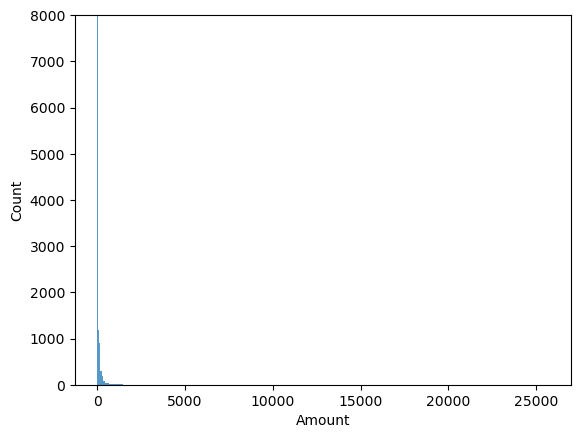

In [12]:
# 단일 데이터 분석 credict.Amount

sns.histplot(credict.Amount)
plt.ylim(0,8000)

<Axes: >

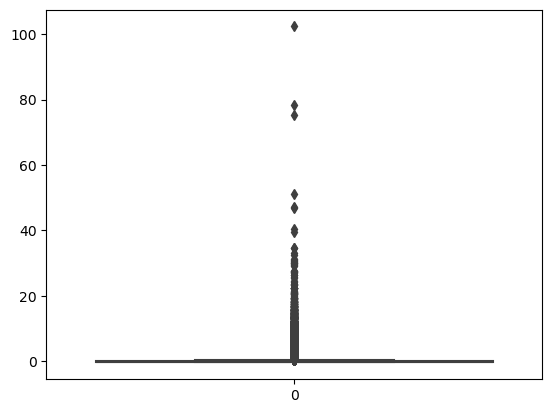

In [31]:
sns.boxplot(credict.Amount)

In [ ]:
from sklearn.preprocessing import StandardScaler   
#minmax로 할 경우 나중에 크고작은값 넣으면 에러로 판단

scaler = StandardScaler()
scaler.fit(credict[['Amount']])
amount= scaler.transform(credict[['Amount']])

credict['Amount']= amount

In [30]:
credict[credict['Amount'] > 50]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,51.265782,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,78.235272,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,75.250581,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,102.362243,0


<Axes: xlabel='Class', ylabel='Amount'>

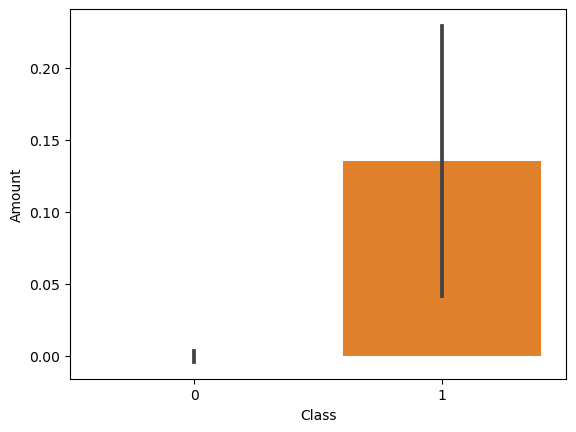

In [6]:
# 독립변수(amount) / 종속변수 (Class)
# 집단의 평균의 차이가 있나? 사기 평균이 더 높을것임
sns.barplot(x='Class', y='Amount', data=credict)

# 사기인 경우에 가격이 더 높음 

<Axes: xlabel='Class', ylabel='Amount'>

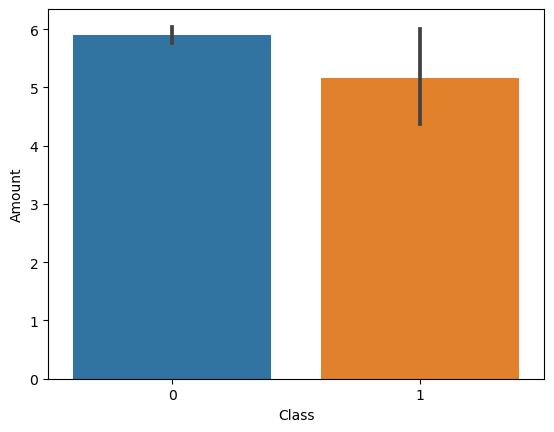

In [7]:
credict2=credict[credict['Amount'] > 3]
sns.barplot(x='Class', y='Amount', data=credict2)
# 큰 금액만 모아서 그래프 그리면 사기가 아닌 경우가 더 많이 씀  => 정상거래 중  몇몇 거래가 금액이 너무 커서 정상거래액 큼 -> 가설 안맞을 듯

In [18]:
# 다시 시작
# 두번째 원본으로 작업/ 원본으로 확인해도 정상거래가 더 액수가 크므로 가설 기각
credict=pd.read_csv('../data/creditcard.csv')
drop_index=credict[credict['Amount'] > 8000].index

In [ ]:
# Amount가 크면 클수록 사기이지 않을까?
# EDA, CDA 방법을 통하여 직접 확인하는 작업
# 이상치> 지울지 말지 처리방법 결정하여 처리

In [19]:
# 절대적으로 1 값이 적으므로 1과 0의 귡형을 맞추어야함 함
# 샘플의 절대적인 차이(불균형)로 인해 언더샘플링, 오버샘플링 필요

credict['Class'].value_counts()/ credict.shape[0]

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [12]:
# 비율이 적지않음 (1800건) ==> 일단 보류: 사기건(목표값)도 괘 있으므로 지울 순 없음 
credict[credict['Amount'] <= 0].Class.value_counts()

Class
0    1798
1      27
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='Amount'>

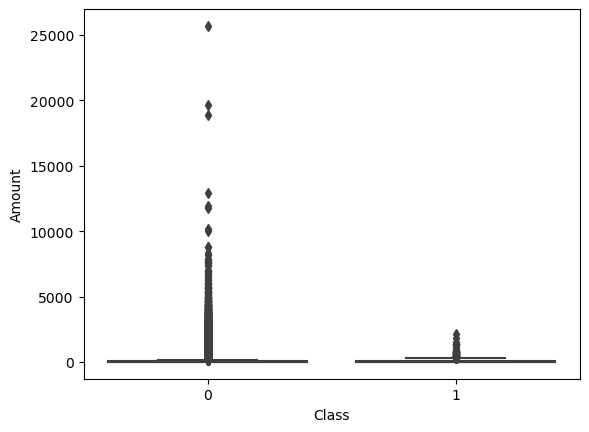

In [13]:
sns.boxplot(y='Amount', x='Class', data=credict)

In [ ]:
# 독립변수(Class)의 데이터의 불균현
# 언더샘플링(under sampling), 오버샘플링(oversampling): 
# 언더샘플링은 잘 안쓰임/ 오버샘플링 주로 씀 
# SMOTE: oversampling technique 

In [ ]:
# SMOTE 설치: anacoda, cmd
# !conda install -c conda-forge imbalanced-learn  -

In [ ]:
from imblearn.combine import SMOTEENN
smoteenn=SMOTEENN()
X_res, y_res = smoteenn.fit_resample(credict, credict['Class'])

In [14]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
# 결합된 형
from imblearn.combine  import SMOTEENN

In [ ]:
# SMOTE: oversampling technique / 시간이 많이 걸림
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()
X_res, y_res=smote.fit_resample(credict, credict['Class'])  # y값, Class값 늘리기

In [ ]:
y_res.shape, y_res.value_counts()

In [ ]:
## 변한값 확인위해 y값을 늘리니 다른 독립 값들은 음수화
credict_res, _ =smote.fit_resample(credict, credict['Class']) 

In [28]:
credict_res.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87816.738264,-2.480587,1.917220,-3.651843,2.327843,-1.629547,-0.718744,-2.933064,0.271447,-1.331281,...,0.397668,-0.009775,-0.004364,-0.054706,0.026533,0.028197,0.080347,0.041173,95.444339,0.5
std,48139.915168,5.450697,3.635173,6.155413,3.143142,4.133190,1.708520,5.713829,4.962704,2.226505,...,2.857008,1.166647,1.019446,0.539744,0.613107,0.447663,0.953369,0.418499,220.111663,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,46050.000000,-3.063492,-0.096885,-5.242926,-0.054695,-1.824465,-1.554077,-3.257350,-0.197474,-2.327630,...,-0.158551,-0.500510,-0.223504,-0.384230,-0.302611,-0.267033,-0.067791,-0.057416,3.359656,0.0
50%,80303.000000,-0.819901,1.019869,-1.552327,1.483942,-0.444902,-0.692950,-0.753578,0.167939,-0.806839,...,0.161397,0.021316,-0.026790,-0.007739,0.045351,-0.007429,0.058197,0.036483,25.000000,0.5
75%,134689.000000,0.823242,2.899321,0.267600,4.344373,0.427734,0.021795,0.186110,0.854791,0.079268,...,0.649262,0.525936,0.187322,0.339813,0.367672,0.307536,0.434265,0.213497,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


<Axes: xlabel='Amount', ylabel='Count'>

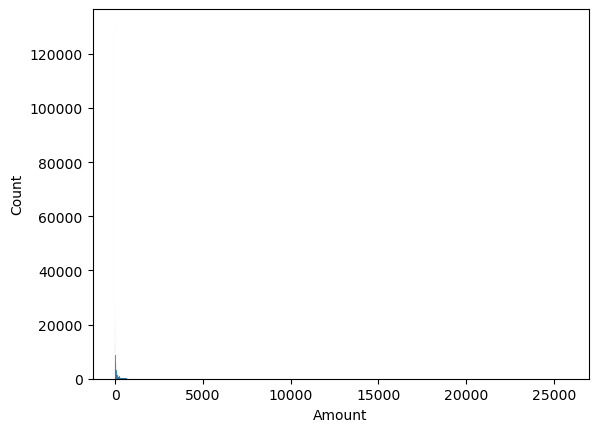

In [30]:
sns.histplot(credict_res.Amount)

In [ ]:
# pip install -U threadpoolctl  # split 해결

In [ ]:
# 사기일 경우가 아닐경우보다 거래액이 높다 - 가설 
sns.barplot(data=credict_res, y='Amount', x='Class')

<Axes: xlabel='Class', ylabel='Amount'>

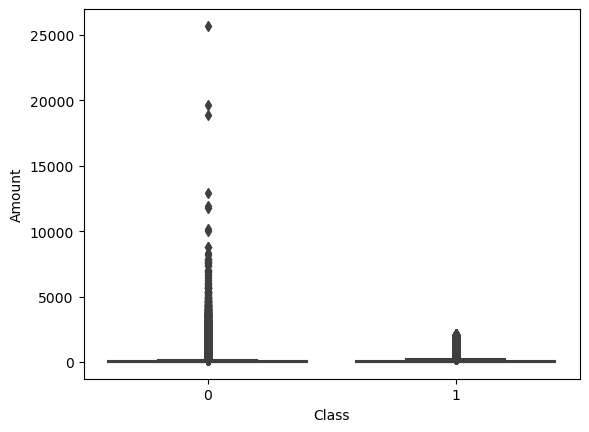

In [35]:
# 분포는 변함없고 y 숫자만 많아짐
sns.boxplot(data=credict_res, y='Amount', x='Class')

In [38]:
amount_1_max=credict_res[credict_res['Class']==1]['Amount'].max()

In [40]:
credict_res=credict_res[credict_res['Amount']<= amount_1_max] 

<Axes: xlabel='Class', ylabel='Amount'>

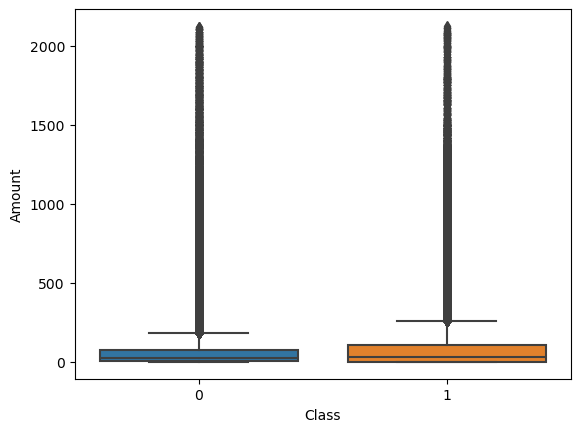

In [41]:
sns.boxplot(data=credict_res, y='Amount', x='Class')

In [44]:
credict_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,143371.574640,-2.308826,3.056626,-3.747295,4.742460,-0.092289,-1.316949,-2.823034,1.593848,-3.368946,...,0.645349,-0.212684,-0.429379,-0.348302,0.347631,0.013730,0.458882,0.134922,0.868022,1
568626,85739.847867,-2.866228,3.071029,-5.564163,3.802175,-2.368895,-1.313950,-4.755785,2.152272,-2.935454,...,0.894934,-0.042074,-0.333391,-0.763997,0.130881,-0.135600,1.173554,0.217945,104.360962,1
568627,8309.211243,0.587477,3.381300,-6.676172,5.959365,-0.661633,-2.505822,-3.081360,0.870799,-1.527576,...,0.558140,0.104947,0.458000,-0.076709,-1.455423,0.379328,0.619588,0.166647,1.000000,1
568628,8737.082640,-1.906400,3.470084,-4.473864,2.794936,-2.119009,-2.333501,-4.257618,1.701940,-1.420716,...,0.664748,-0.514472,-0.010589,0.070764,0.063171,0.305386,0.436757,0.221407,1.000000,1


In [ ]:
# 데이터 전처리 : V1, V2..상관성검사--통계(독립변수와 독립변수간의 관계): 너무 관계가 밀접하면 과적합이 일어남
credict_res.corr()

<Axes: >

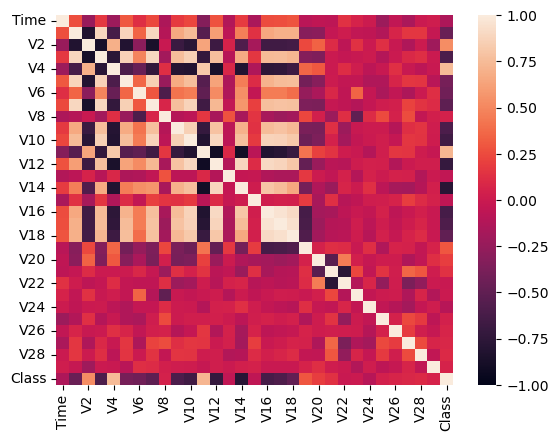

In [46]:
# 독립변수들간의 상관, 역상관 관계 밀접한 경우 정리 필요: 예) V2,V7
sns.heatmap(credict_res.corr(), vmin=-1, vmax=1)

In [ ]:
# 데이터 분석 --> 머신러닝 분석
# 데이터 전처리/ 모델선택/학습/에측/평가
# 데이터 전처리 - 컬럼제거(Time), 스케일링(Amount)
credic_res= credict_res.drop('Time', axis=1)

In [72]:
scaler = StandardScaler()
credict['Amount_scaled']= scaler.fit_transform(credict_res[['Amount']])
credic_res=credict.drop('Amount', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
y=credic_res['Class']
x= credic_res.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [97]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# 분류 모델 선택-다양한 시도 후
from sklearn.model_selection import cross_val_score     # 학습, 예측, 평가까지
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

dt_clf= DecisionTreeClassifier(random_state=0)
rf_clf= RandomForestClassifier(random_state=0)
gbm_clf= GradientBoostingClassifier(random_state=0)
knn_clf=KNeighborsClassifier()
lr_clf=LogisticRegression(random_state=0)
svm_clf=SVC(random_state=0)
xgb_clf=XGBClassifier(random_state=0)

In [ ]:
# 시간이 너무 많이 걸려서 멈춤
models=[dt_clf,rf_clf,gbm_clf,knn_clf,lr_clf,svm_clf,xgb_clf]
model_scores=[]
for model in models:
    scores= cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)
    model_scores.append(scores.mean())

In [81]:
scores= cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv=3)

In [89]:
# 시간이 많이 걸려서 샘플 뽑아서 함: X 데이터 1/45으로 축소

_, X_sample, _, y_sample=train_test_split(X_train, y_train, test_size=1/45, random_state=0)
print(X_sample.shape, y_sample.shape)

(10099, 29) (10099,)


In [93]:
#knn 은 넘파이 array로 넣으면 에러 안남
cross_val_score(knn_clf, X_sample.values, y_sample, scoring='accuracy', cv=3)

array([0.95515296, 0.96256684, 0.95781343])

In [94]:
# sample로 각 모델 할 것: 최근접이웃 에러남 :array로 넣기
models=[dt_clf,rf_clf,gbm_clf,lr_clf,svm_clf,xgb_clf,knn_clf]
model_scores=[]
for model in models:
    scores= cross_val_score(model, X_sample.values, y_sample, scoring='accuracy', cv=3)
    model_scores.append(scores.mean())

In [95]:
model_scores  # xgb, rf, gbm 순으로 성능 좋음 

[0.9746509452391806,
 0.9884147237088413,
 0.9836618954266013,
 0.9800970095087741,
 0.9228638640403347,
 0.9906920495155789,
 0.958511076158135]

In [112]:
# RandomForest, LogistcRegression 해보기 : sample 좀 더 많이
# 파라미터 찾기  ## 검토
rf_clf= RandomForestClassifier(random_state=0)
lr_clf=LogisticRegression(random_state=0)

In [113]:
_, X_sample, _, y_sample=train_test_split(X_train, y_train, test_size=3/45, random_state=0)
print(X_sample.shape, y_sample.shape)

(30295, 29) (30295,)


In [ ]:
params={'solver':['liblinear','lbfgs'],'penalty': ['11', '12'], 'C': [0.001,0.01,0.05,0.1,1.0]}
grid=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=2)
grid.fit(X_sample, y_sample)

In [ ]:
grid.best_score_

In [114]:
# 시간 많이 걸려 취소
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 오버샘플링 하고 안하고 비교  --시간 문제로 패쑤
# 독립변수 간의 연관성 제거 한 것 안한 것 결과 비교 
# : logistic 등 선형에서는 영향 많음/ 다른 분류모델에서는 상관 없음 --시간 문제로 패쑤
# 책 295페이지 ##검토

In [115]:
# 독립변수 간의 연관성 제거 한 것 안한 것 결과 비교 /logistic
# V2, V7 제거 안함
lr_clf=LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
accuracy_score(y_test,pred)

0.981295002024541

In [120]:
# V2, V7 제거 함  ==> 제거 한 것이 더 낮음/ 그럴 수 있음
X_train_drop=X_train.drop(['V5','V7'], axis=1)
X_test_drop=X_test.drop(['V5','V7'], axis=1)
lr_clf=LogisticRegression(random_state=0)
lr_clf.fit(X_train_drop, y_train)
pred=lr_clf.predict(X_test_drop)
accuracy_score(y_test,pred)

0.9799570445222964

In [121]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [126]:
# 파이프라인 구축: 스케일러, 모델
from sklearn.pipeline import Pipeline
scaler= StandardScaler()
lr_clf=LogisticRegression(random_state=0)

pipe=Pipeline([('SC', scaler),('LR', lr_clf)])   

In [127]:
# 파이프라인 학습-스케일링, 모델학습
pipe.fit(X_train, y_train)

Pipeline(steps=[('SC', StandardScaler()),
                ('LR', LogisticRegression(random_state=0))])

In [128]:
# 파이프라인 예측 - 스케일링, 모델예측
pred=pipe.predict(X_test)  # 스케일링과 학습까지도 해줌

print(accuracy_score(y_test, pred))  #성능과 상관없음, 과정은 간소화함

0.8246753246753247


In [133]:
# 파이프라인 + GridSearchCV (방법1)
# GridSearchCV(lr_clf, param_grid={'c': [0.01,0.1]})
params={'LR__c': [0.01,0.1]}   # 모델의 이름에 변수를 합쳐 쓴다
GridSearchCV(pipe, param_grid=params,scoring='accuracy', cv=3)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('SC', StandardScaler()),
                                       ('LR',
                                        LogisticRegression(random_state=0))]),
             param_grid={'LR__c': [0.01, 0.1]}, scoring='accuracy')

In [132]:
pd.DataFrame(grid.cv_results_)  # 검토

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
# 데이터 전체 과정 진행하는 모델 만들기 가능/ pipeline 과 ColumnTransformer 사용

from sklearn.compose import ColumnTransformer
